# Taller 3 MLOps - Data Science Salaries 2023
## Fase 1: Entendimiento de Negocio y Datos

### Universidad EIA
Aplicación de metodología CRISP-DM

## 1. ENTENDIMIENTO DE NEGOCIO

### Objetivo de Negocio:
Desarrollar un modelo predictivo que permita a profesionales y empresas de tecnología estimar salarios en el área de Data Science. Esto es útil para:
- Profesionales: Negociar salarios de acuerdo a su perfil
- Empresas: Establecer rangos salariales competitivos
- RR.HH.: Tomar decisiones en contrataciones

### Objetivo Analítico:
Crear un modelo de **REGRESIÓN** que prediga el salario en USD de un profesional de Data Science basado en:
- Título del puesto
- Nivel de experiencia
- Tipo de empleo
- Ratio de trabajo remoto
- Ubicación de la empresa
- Tamaño de la empresa

**Variable Target**: `salary` (en USD)

---

## 2. ENTENDIMIENTO DE LOS DATOS

### Importar Librerías

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


### Descargar y Cargar el Dataset

In [7]:
# Descargar el dataset desde Kaggle
# Primero, asegúrate de tener las credenciales de Kaggle configuradas
# Para esto necesitas:
# 1. Descargar kaggle.json desde tu cuenta de Kaggle
# 2. Colocarlo en ~/.kaggle/kaggle.json
# 3. Ejecutar: chmod 600 ~/.kaggle/kaggle.json

import os
import subprocess

# Crear carpeta data si no existe
os.makedirs('../data', exist_ok=True)

# Descargar dataset
try:
    subprocess.run(
        ['kaggle', 'datasets', 'download', '-d', 'arnabchaki/data-science-salaries-2023', '-p', '../data/', '--unzip'],
        check=True
    )
    print("Dataset descargado exitosamente")
except Exception as e:
    print(f"Error descargando el dataset: {e}")
    print("Asegúrate de tener kaggle CLI instalado: pip install kaggle")
    print("Y credenciales configuradas en ~/.kaggle/kaggle.json")

Error descargando el dataset: [Errno 2] No such file or directory: 'kaggle'
Asegúrate de tener kaggle CLI instalado: pip install kaggle
Y credenciales configuradas en ~/.kaggle/kaggle.json


### Cargar Datos

In [8]:
# Cargar el dataset
df = pd.read_csv('../data/ds_salaries.csv')

print(f"Shape del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head())

Shape del dataset: (3755, 11)

Primeras filas:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0    

### Información General del Dataset

In [9]:
# Información del dataset
print("Información del Dataset:")
print("="*50)
print(f"\nTotal de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")
print(f"\nColumnas:\n{df.columns.tolist()}")

print(f"\nTipos de datos:")
print(df.dtypes)

print(f"\nValores faltantes:")
print(df.isnull().sum())

Información del Dataset:

Total de registros: 3755
Total de columnas: 11

Columnas:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

Tipos de datos:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Valores faltantes:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Análisis Estadístico Básico

In [10]:
# Estadísticas descriptivas
print("Estadísticas Descriptivas:")
print(df.describe())

Estadísticas Descriptivas:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


### Análisis Univariante - Variable Target (Salary)

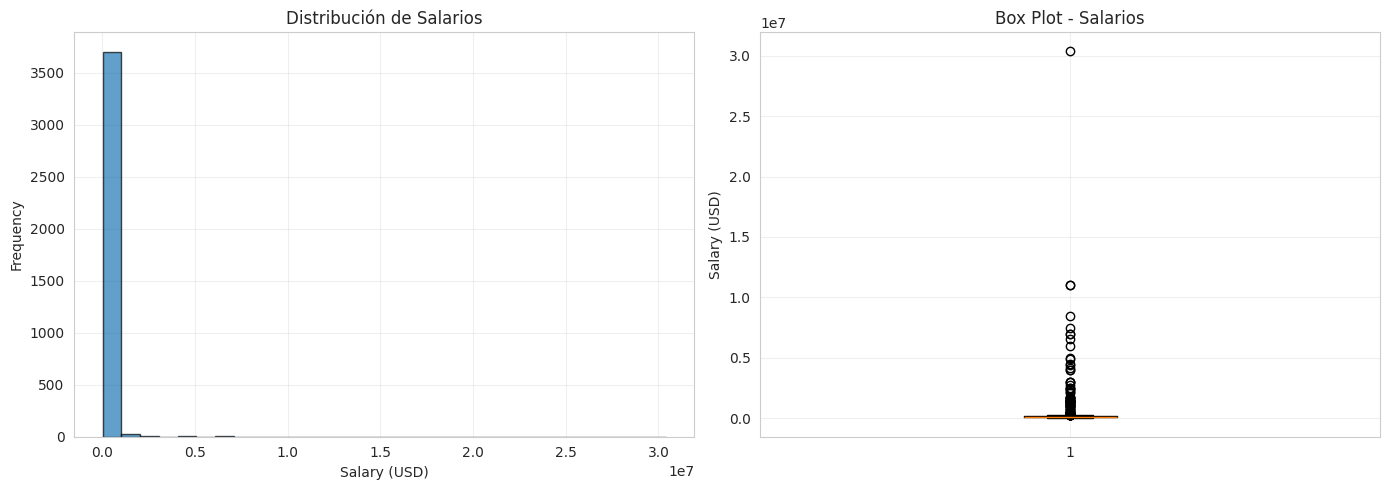


Estadísticas de Salary:
Media: $190,695.57
Mediana: $138,000.00
Min: $6,000.00
Max: $30,400,000.00
Desv. Estándar: $671,676.50


In [11]:
# Análisis de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['salary'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribución de Salarios')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['salary'], vert=True)
axes[1].set_ylabel('Salary (USD)')
axes[1].set_title('Box Plot - Salarios')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/salary_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\nEstadísticas de Salary:")
print(f"Media: ${df['salary'].mean():,.2f}")
print(f"Mediana: ${df['salary'].median():,.2f}")
print(f"Min: ${df['salary'].min():,.2f}")
print(f"Max: ${df['salary'].max():,.2f}")
print(f"Desv. Estándar: ${df['salary'].std():,.2f}")

### Análisis de Variables Categóricas

In [12]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables Categóricas: {categorical_cols}")

# Mostrar valores únicos
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} valores únicos")
    print(df[col].value_counts())

Variables Categóricas: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

experience_level: 4 valores únicos
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

employment_type: 4 valores únicos
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

job_title: 93 valores únicos
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

salary_currency: 20 valores únicos
salar

### Análisis Bivariante - Relación con Salary

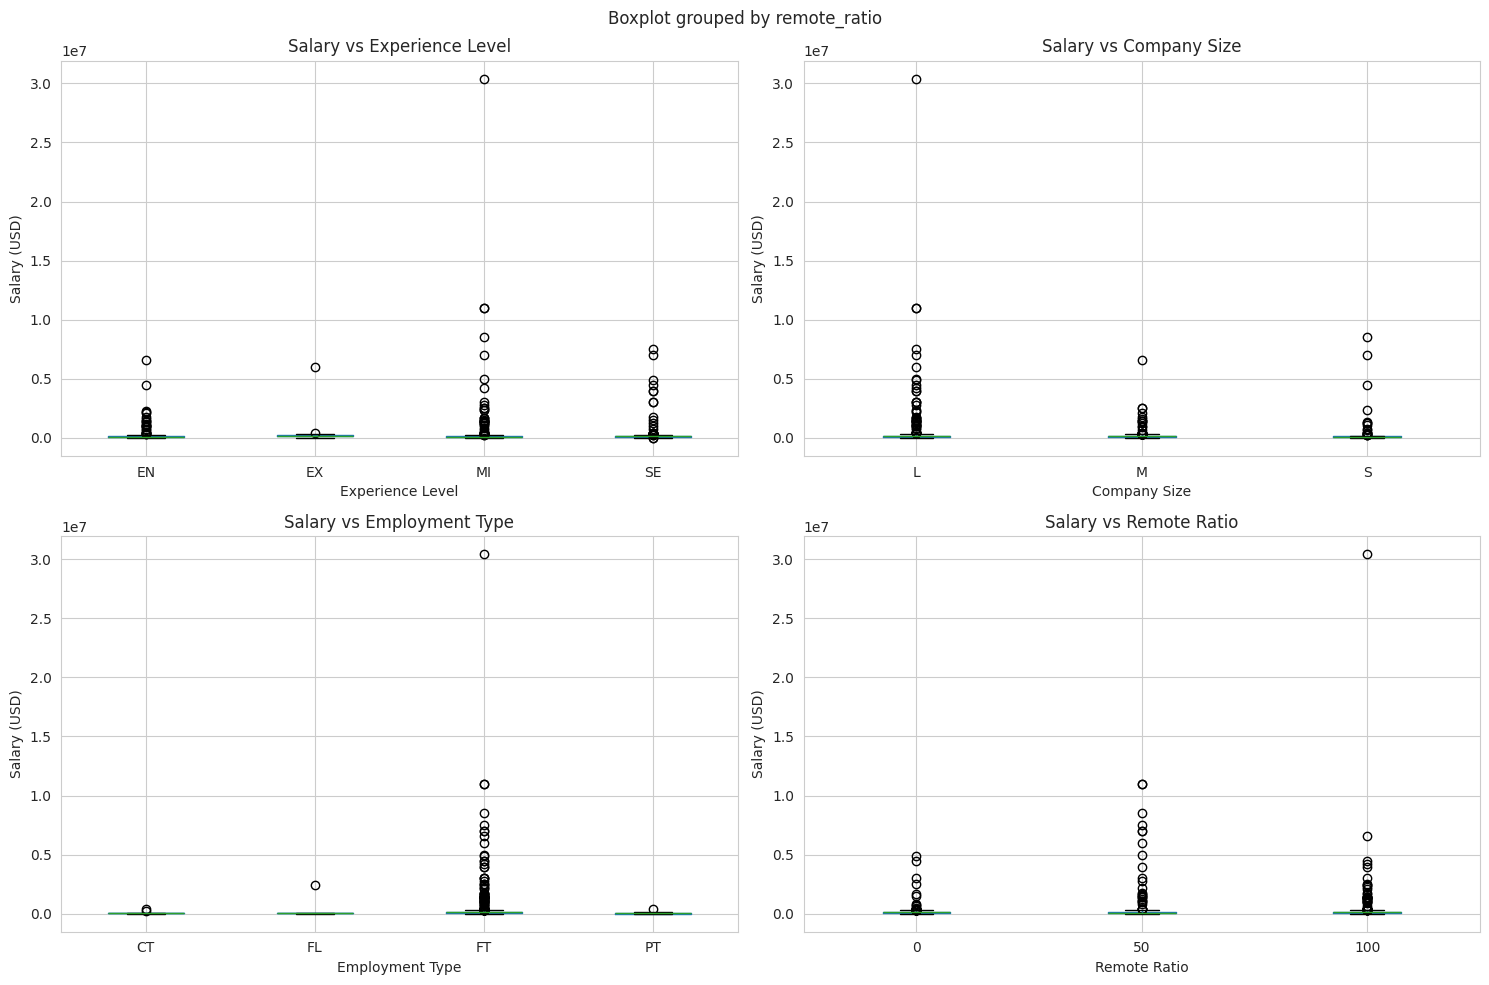

In [13]:
# Análisis bivariante: Salary vs variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relación entre Variables Categóricas y Salary', fontsize=16, y=1.00)

# Experience Level vs Salary
if 'experience_level' in df.columns:
    df.boxplot(column='salary', by='experience_level', ax=axes[0, 0])
    axes[0, 0].set_title('Salary vs Experience Level')
    axes[0, 0].set_xlabel('Experience Level')
    axes[0, 0].set_ylabel('Salary (USD)')

# Company Size vs Salary
if 'company_size' in df.columns:
    df.boxplot(column='salary', by='company_size', ax=axes[0, 1])
    axes[0, 1].set_title('Salary vs Company Size')
    axes[0, 1].set_xlabel('Company Size')
    axes[0, 1].set_ylabel('Salary (USD)')

# Employment Type vs Salary
if 'employment_type' in df.columns:
    df.boxplot(column='salary', by='employment_type', ax=axes[1, 0])
    axes[1, 0].set_title('Salary vs Employment Type')
    axes[1, 0].set_xlabel('Employment Type')
    axes[1, 0].set_ylabel('Salary (USD)')

# Remote Ratio vs Salary
if 'remote_ratio' in df.columns:
    df.boxplot(column='salary', by='remote_ratio', ax=axes[1, 1])
    axes[1, 1].set_title('Salary vs Remote Ratio')
    axes[1, 1].set_xlabel('Remote Ratio')
    axes[1, 1].set_ylabel('Salary (USD)')

plt.tight_layout()
plt.savefig('../data/bivariate_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

### Conclusiones de la Fase 1

In [14]:
print("\n" + "="*70)
print("CONCLUSIONES - FASE 1: ENTENDIMIENTO DE NEGOCIO Y DATOS")
print("="*70)

print(f"""
✓ OBJETIVO DE NEGOCIO:
  Predecir salarios en Data Science para profesionales y empresas.

✓ OBJETIVO ANALÍTICO:
  Modelo de Regresión para predecir 'salary' (USD)
  
✓ DATOS:
  - Registros: {len(df)}
  - Características: {len(df.columns) - 1} (excluyendo target)
  - Valores faltantes: {df.isnull().sum().sum()}
  - Rango de salarios: ${df['salary'].min():,} - ${df['salary'].max():,}

✓ PRÓXIMO PASO:
  Preparación de datos - Transformaciones y encoding de variables
""")

print("="*70)


CONCLUSIONES - FASE 1: ENTENDIMIENTO DE NEGOCIO Y DATOS

✓ OBJETIVO DE NEGOCIO:
  Predecir salarios en Data Science para profesionales y empresas.

✓ OBJETIVO ANALÍTICO:
  Modelo de Regresión para predecir 'salary' (USD)

✓ DATOS:
  - Registros: 3755
  - Características: 10 (excluyendo target)
  - Valores faltantes: 0
  - Rango de salarios: $6,000 - $30,400,000

✓ PRÓXIMO PASO:
  Preparación de datos - Transformaciones y encoding de variables

